In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


sns.set_theme(style="whitegrid")

## Loading Data
Loading in simple datasets
1. Overall team error data: foul call mistakes that have hurt & benefitted teams.
2. Player incorrect no call data: individual player foul data, where a call was missed, hurting said player.
2. Player incorrect call data: individual player foul data, where a foul called was an incorrect call.

In [77]:
team_error_data = pd.read_csv("../data/insights/team_errors.csv")
player_non_call_data = pd.read_csv("../data/insights/player_incorrect_non_calls.csv")
player_bad_foul_data = pd.read_csv("../data/insights/player_incorrect_fouls.csv")
officiating_error_data = pd.read_csv("../data/insights/officiating_errors.csv")
officiating_team_assistive = pd.read_csv("../data/insights/ref_team_assist.csv")
officiating_team_harmful = pd.read_csv("../data/insights/ref_team_harms.csv")

## Visualizing the teams that benefitted the least/most from officiating errors
- We notice that the Nuggets have the largest delta in calls that were incorrect and went against them.
- The Lakers have been the greatest beneficiary of incorrect foul calls from NBA games this year.


Text(0.5, 1.0, 'Teams Most Impacted by Officiating Errors (Positively & Negatively)')

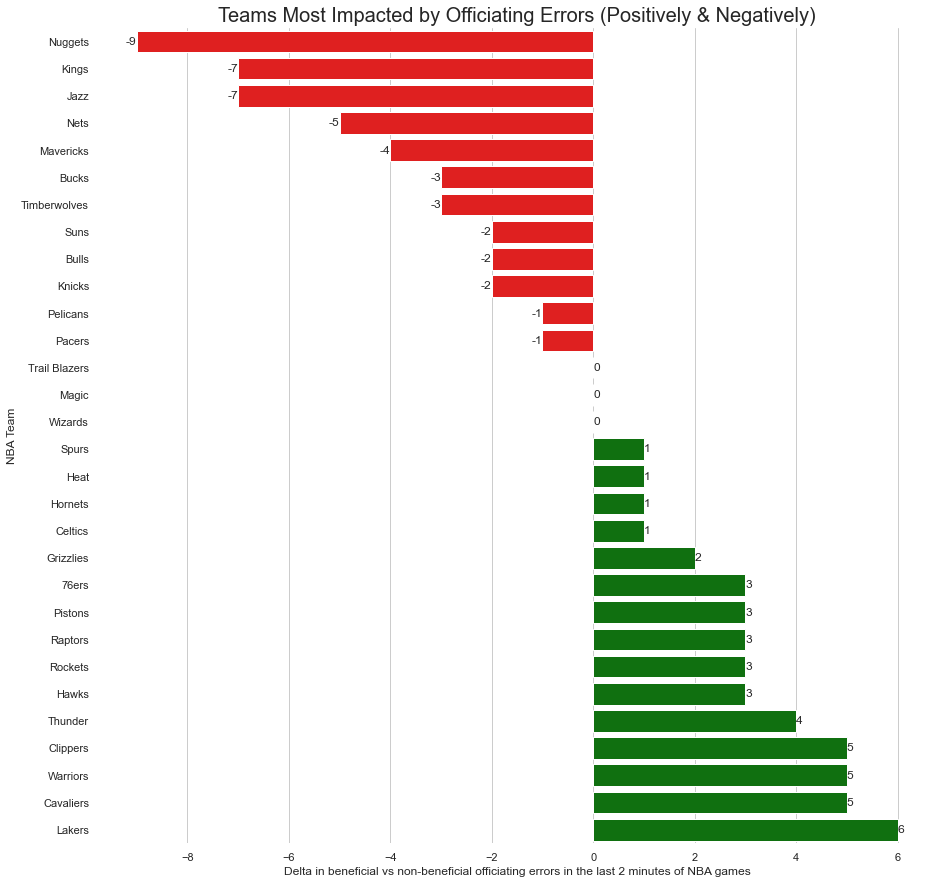

In [101]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

cols = ['red' if x < 0 else 'green' for x in team_error_data.errorDelta]
sns.barplot(x="errorDelta", y="teamName", data=team_error_data,
            label="Total", palette=cols)

# sns.set_color_codes("muted")
# sns.barplot(x="errorsAgainst", y="teamName", data=team_error_data,
#             label="Errors Against", color="g")

# Add a legend and informative axis label
ax.set(ylabel="NBA Team",
       xlabel="Delta in beneficial vs non-beneficial officiating errors in the last 2 minutes of NBA games")
ax.bar_label(ax.containers[0])
sns.despine(left=True, bottom=True)
plt.title('Teams Most Impacted by Officiating Errors (Positively & Negatively)', fontsize=20)

Text(0.5, 1.0, 'Average Number of Officiating Errors of 3-person crew (official is a member of crew) by Official')

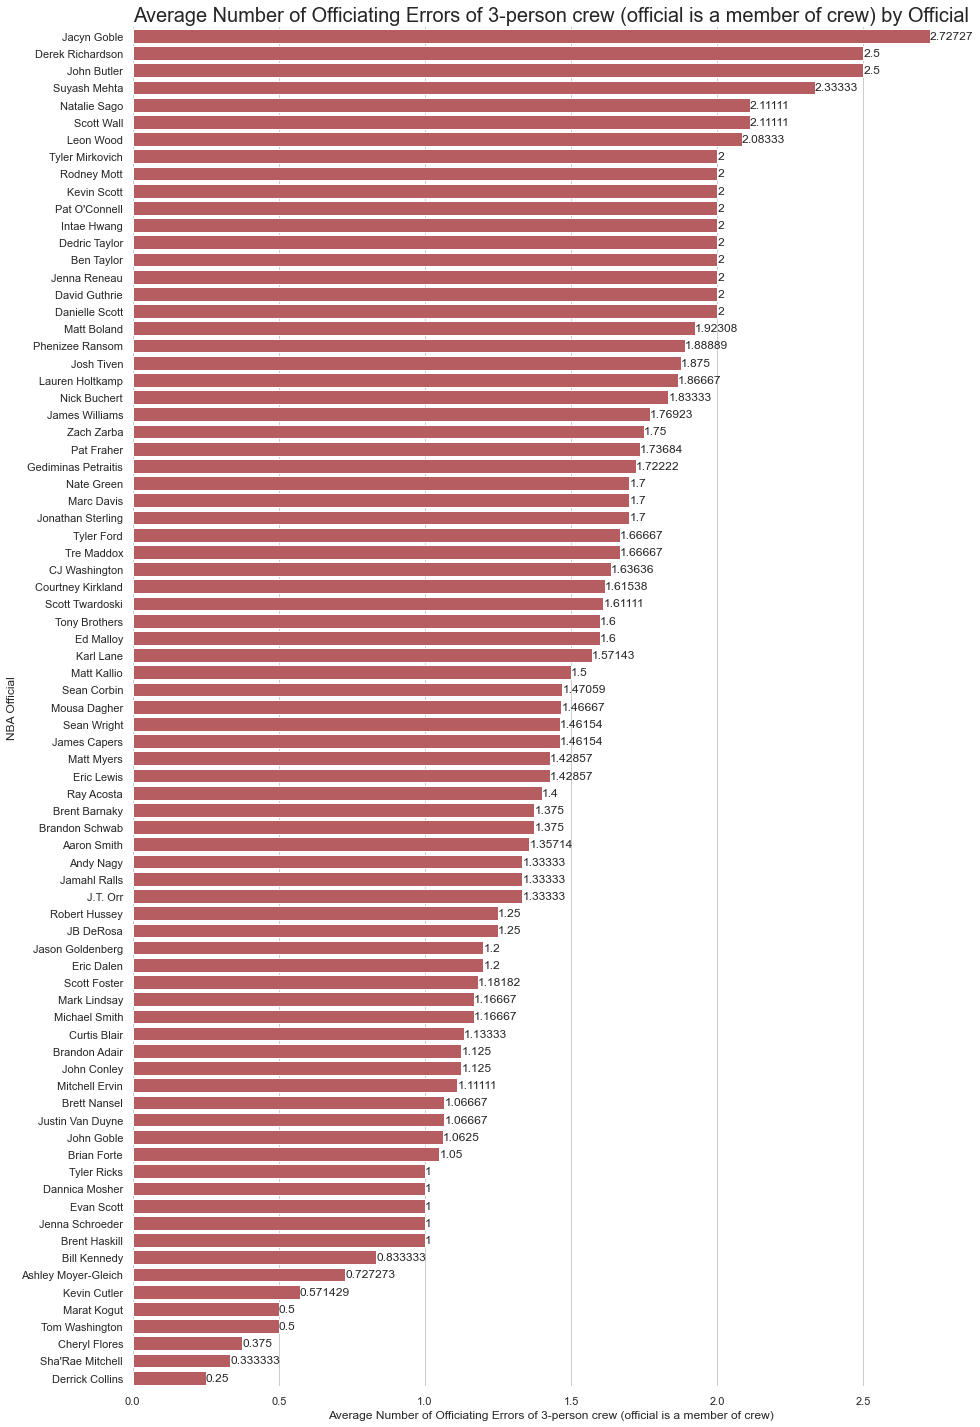

In [102]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 25))

sns.barplot(x="errorsPerGame", y="name", data=officiating_error_data,
            label="Errors Per Game", color="r")

# Add a legend and informative axis label
ax.set(ylabel="NBA Official",
       xlabel="Average Number of Officiating Errors of 3-person crew (official is a member of crew)")
ax.bar_label(ax.containers[0])

sns.despine(left=True, bottom=True)
plt.title('Average Number of Officiating Errors of 3-person crew (official is a member of crew) by Official', fontsize=20)

Text(0.5, 1.0, 'Heatmap of officials commiting helpful errors for a particular team')

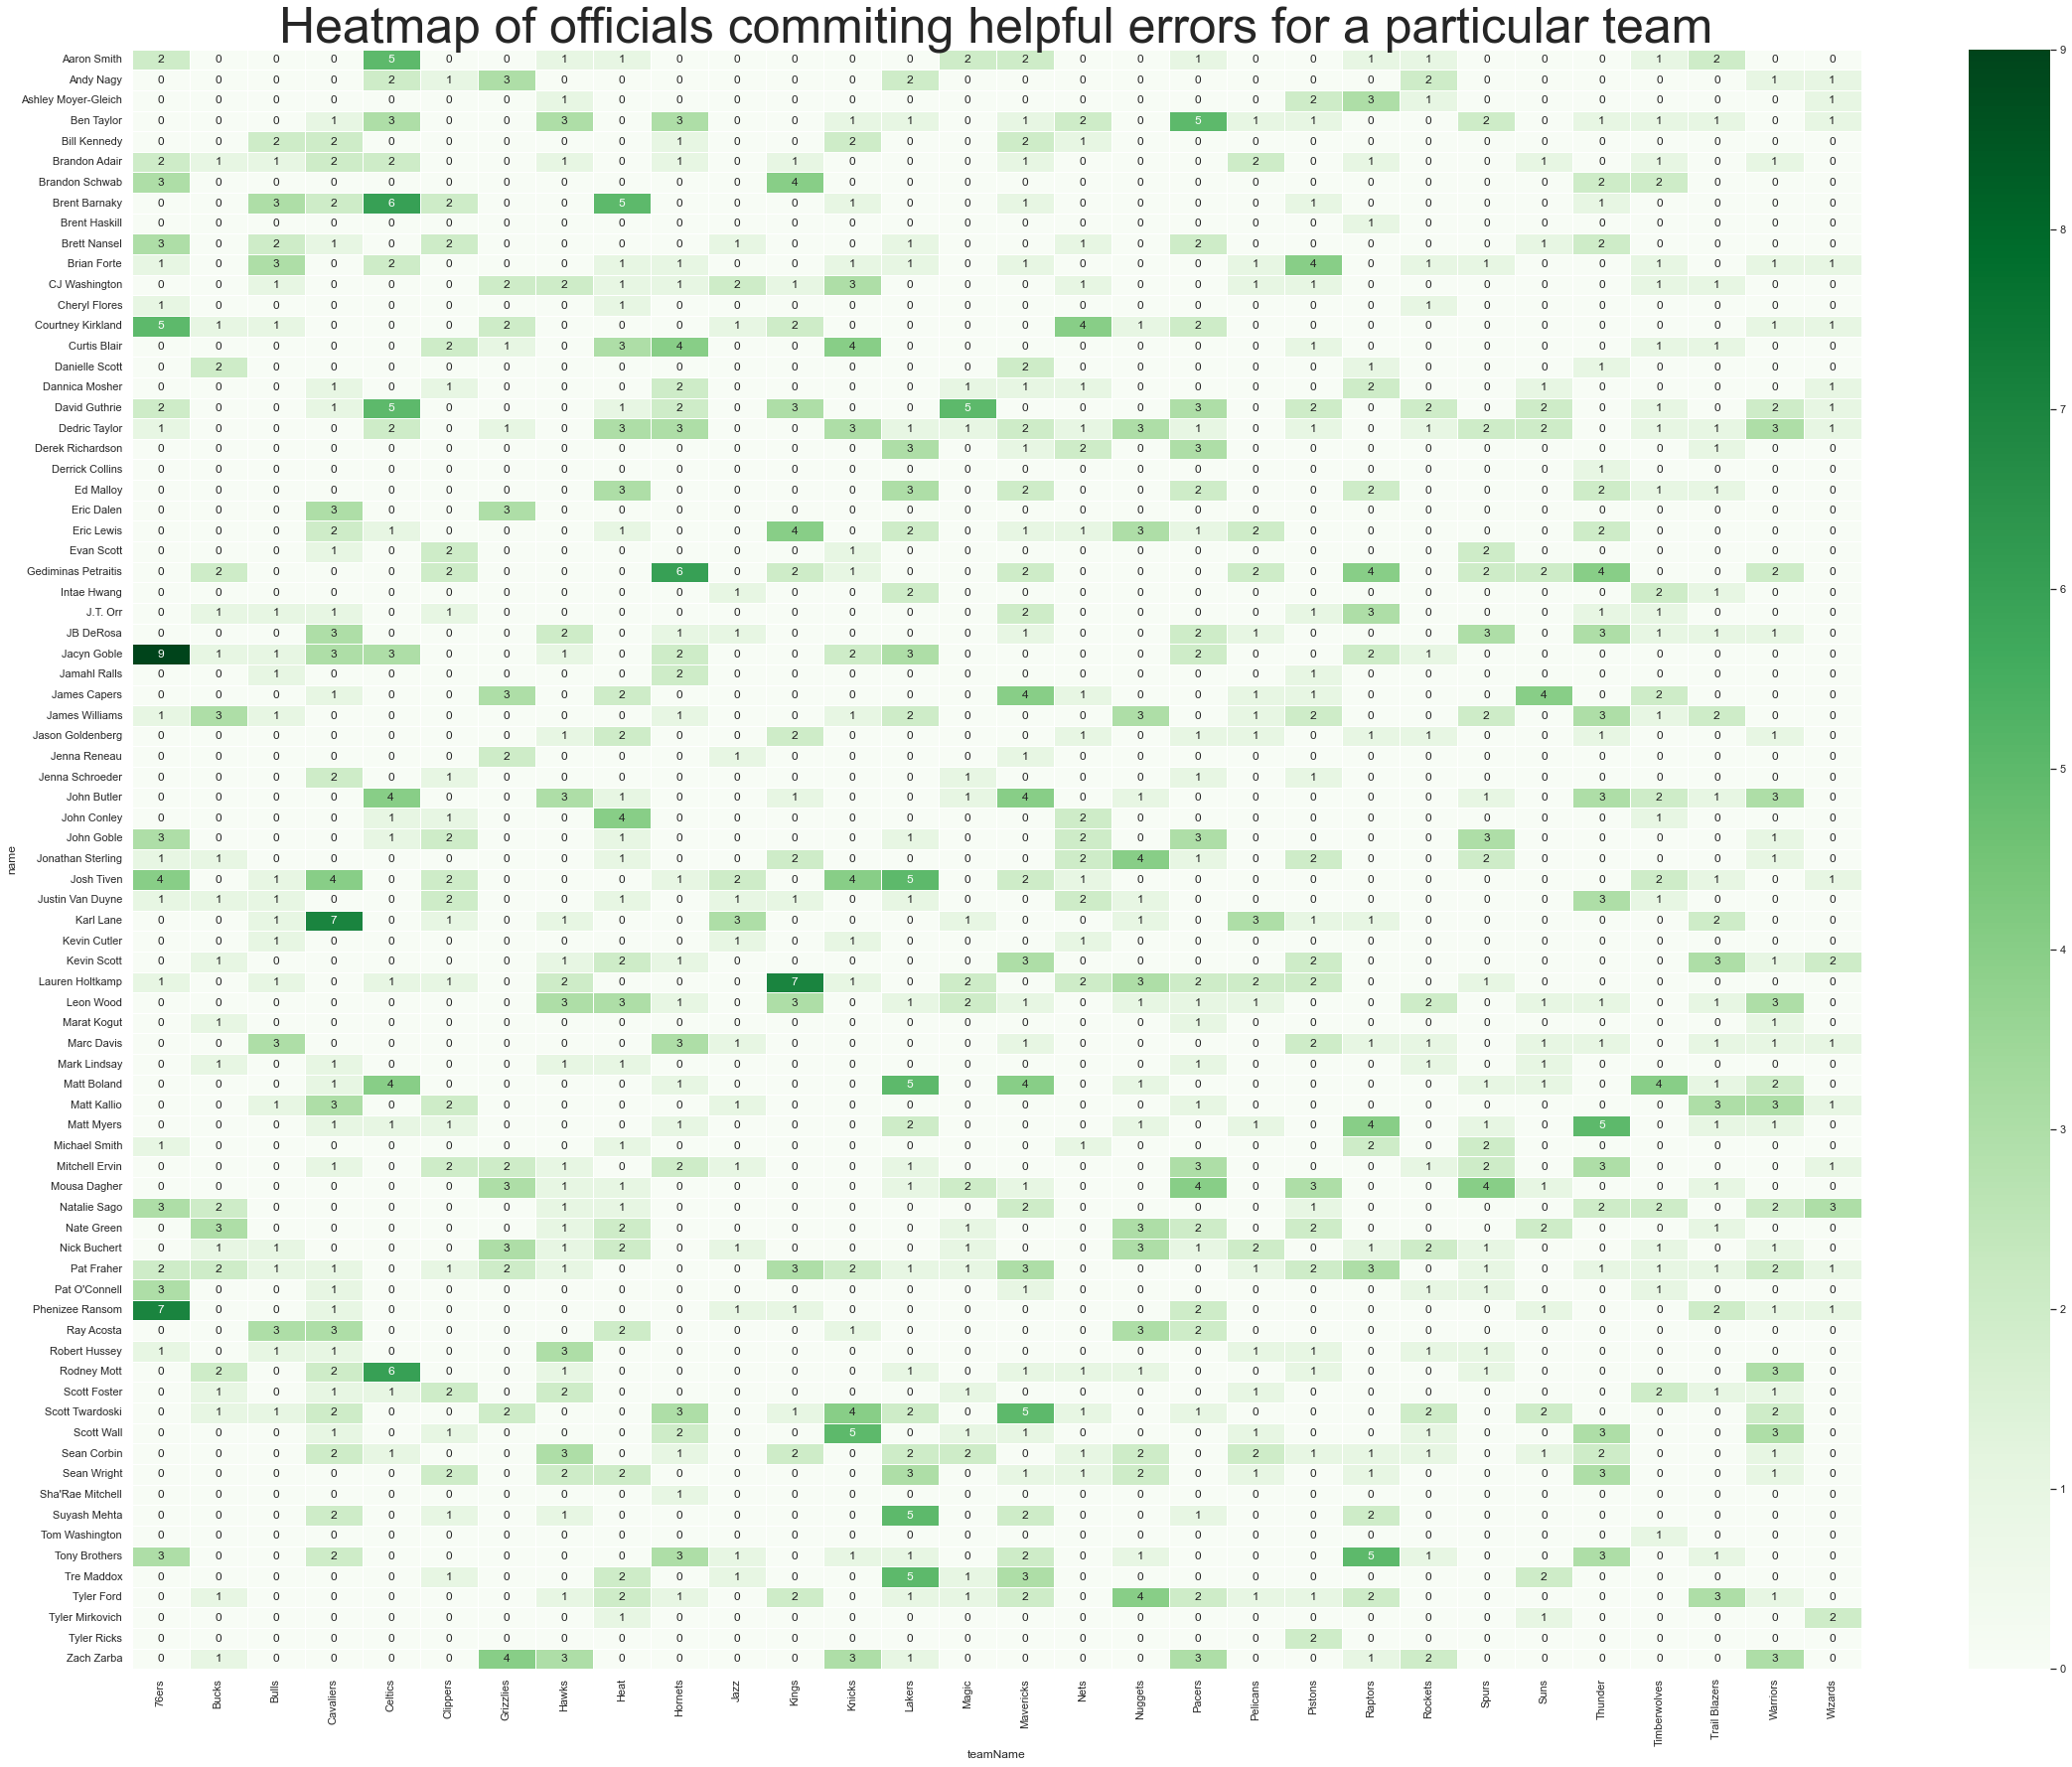

In [105]:
pivoted_assistive = officiating_team_assistive.pivot("name", "teamName", "errorsInFavor").fillna(0)
for col in pivoted_assistive.columns:
    pivoted_assistive[col] = pivoted_assistive[col].astype(np.int64)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(39, 30))
sns.heatmap(pivoted_assistive, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Greens")

plt.title('Heatmap of officials commiting helpful errors for a particular team', fontsize=50)

Text(0.5, 1.0, 'Heatmap of officials commiting harmful errors for a particular team')

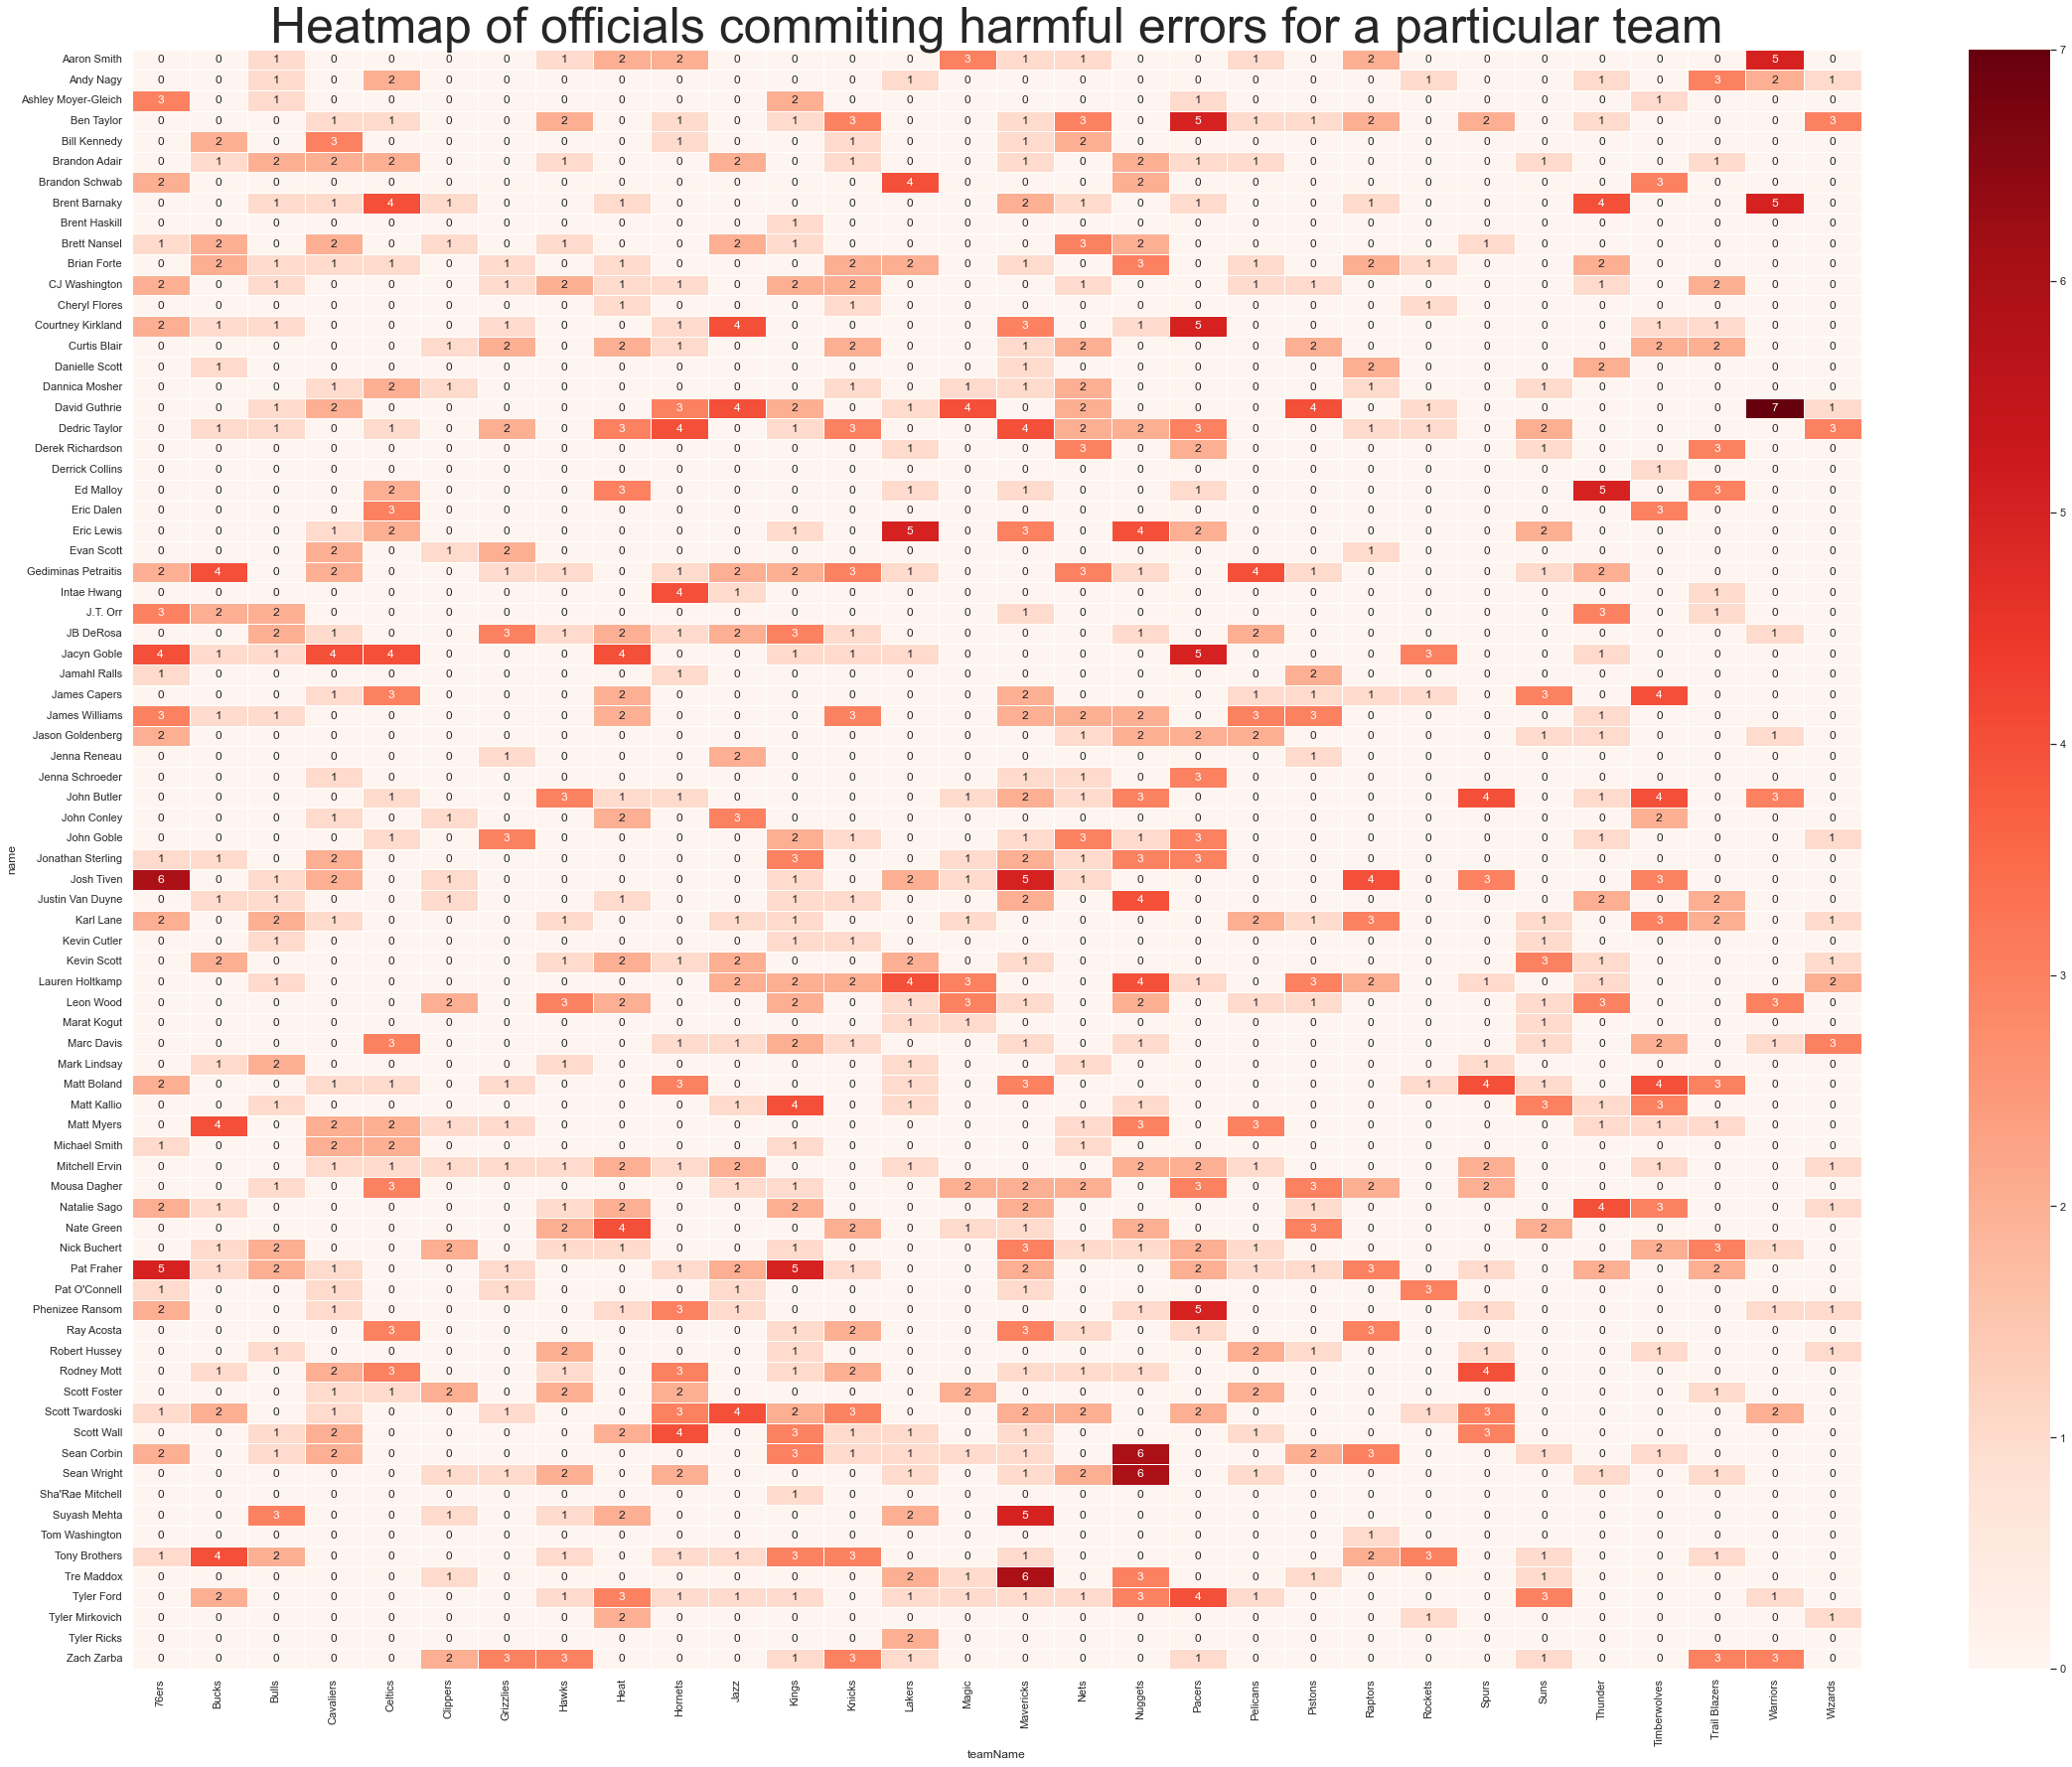

In [106]:
pivoted_harmful = officiating_team_harmful.pivot("name", "teamName", "errorsAgainst").fillna(0)
for col in pivoted_harmful.columns:
    pivoted_harmful[col] = pivoted_harmful[col].astype(np.int64)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(39, 30))
sns.heatmap(pivoted_harmful, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="Reds")
plt.title('Heatmap of officials commiting harmful errors for a particular team', fontsize=50)